# Object Oriented Programmin in Python

Many people refer to Python as an Object Oriented Programming (OOP) language. This is accurate but comes with a big asterisk. It may be more accurate to say that Python is a language that allows you to write object oriented code, if you choose. However, unlike traditional traditional OOP languages like Java and C#, Python in no way enforces OOP conventions, which means if you was to write object oriented code, it is up to you to ensure you adherring to generally acceptable OOP standards. This brings us to an important point, what is OOP and why do we care about it?

Generally, OOP is a model for writing code that centers software design around data or objects, as opposed to functions or routines. Some important concepts in OOP are:

* Encapsulation: Encapulation is the process of grouping logically connected data and operations in a way that makes them self contained such that external operations do not have to worry about the internal functioning of an object.
* Abstraction: This is a design pattern in which data is only available to the appropriate objects and leads to a concept known as [data hiding](https://en.wikipedia.org/wiki/Information_hiding) wherein the availability of instances of data (member variables) is controlled either by keyword (as in Java) or convention (as in Python).
* Polymorphism: This is a design pattern wherein multiple constructs share a common higher-level construct that defines different asspects of those constructs that may have different implementations (the classic example is how Square and Triangle are both types of Shapes that both have an area, but that area is calculated differently). In more concrete terms, this is concept that typically gets applied in programming languages through abstract classes and interfaces.
* Inheritance: The mechanism that allows a subclass (or derived class) to inherit properties and behaviors from a parent class (or base class). This allows the subclass to have access to the data and methods of the parent class, and also allows it to add its own unique features and behaviors.
* Class: A blueprint that defines the properties and behaviors of an object. It serves as a template for creating objects, and each object that is created from a class is called an instance of that class. A class can be thought of as a type or category of objects, and it typically includes data and methods that are shared by all objects of that type.
* Object: This is a single instance or instantiation of a class


## Encapsulation

In Python, encapsulation is achieved through the use of classes. Here is an example:
    

In [1]:
class BankAccount:
    def __init__(self, account_number: str, balance: float):
        self.account_number = account_number
        self.balance = balance

    def deposit(self, amount: float) -> None:
        self.balance += amount
        print(f"Balance after deposit: {self.balance}")

    def withdraw(self, amount: float) -> None:
        if amount > self.balance:
            raise ValueError("Insufficient funds")
        self.balance -= amount
        print(f"Balance after withdrawl: {self.balance}")

account = BankAccount("123456", 1000)
account.deposit(500)
account.withdraw(250)

Balance after deposit: 1500
Balance after withdrawl: 1250


In this example, the BankAccount class encapsulates the data and behavior associated with a bank account, such as the account number and balance, as well as methods for depositing and withdrawing money. The data and behavior are "encapsulated" within the class, and can only be accessed or modified through the methods defined in the class. This helps to prevent external code from directly modifying the internal state of the bank account in an invalid or inconsistent manner.






## Abstraction

In [2]:
class ATM:
    def __init__(self, bank_account):
        self.bank_account = bank_account

    def check_balance(self):
        return self.bank_account.balance

    def withdraw(self, amount):
        self.bank_account.withdraw(amount)

account = BankAccount(123456, 1000)
atm = ATM(account)

balance = atm.check_balance()
atm.withdraw(100)


Balance after withdrawl: 900


In this example, the BankAccount class is an abstract representation of a bank account, providing methods for depositing and withdrawing money. The ATM class is a more specific implementation that uses a BankAccount object to provide ATM functionality, such as checking the balance and withdrawing money. The ATM class provides an abstract interface for interacting with a bank account, without exposing the internal details of how the account is represented or how the various operations are performed. This allows the implementation of the BankAccount class to be changed or updated without affecting the behavior of the ATM class.

### Data Hiding in Python

Unlike in other OOP languages, like Java and C#, there is not way to make data hiding required. Instead, you have to rely on conventions that are possible to override. For instance:

In [3]:
class BankAccount:
    def __init__(self, account_number: str, balance: float):
        self.account_number = account_number
        self.balance = balance
        self._weak_internal_variable = self._weak_internal_classifier()
        self.__stronger_internal_variable = self.__stronger_internal_classifier()
        
    def _weak_internal_classifier(self):
        if self.balance < 100:
            return "low"
        elif self.balance > 1000:
            return "high"
        else:
            return "mid"
        
    def __stronger_internal_classifier(self):
        return self._weak_internal_variable

In [4]:
account = BankAccount('123', 1001)
dir(account)

['_BankAccount__stronger_internal_classifier',
 '_BankAccount__stronger_internal_variable',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_weak_internal_classifier',
 '_weak_internal_variable',
 'account_number',
 'balance']

In [5]:
account._weak_internal_variable

'high'

In [6]:
account._weak_internal_classifier()

'high'

In [7]:
account.__stronger_internal_variable

AttributeError: 'BankAccount' object has no attribute '__stronger_internal_variable'

In [8]:
account.__stronger_internal_classifier()

AttributeError: 'BankAccount' object has no attribute '__stronger_internal_classifier'

In [9]:
account._BankAccount__stronger_internal_variable

'high'

In [10]:
account._BankAccount__stronger_internal_classifier()

'high'

## Polymorphism

Continuing with the BankAccount example, we can look at an example of polymorphism in Python:

In [11]:
from abc import ABC, abstractmethod

class AbstractBankAccount(ABC):
    @abstractmethod
    def deposit(self, amount: float):
        pass
    
    @abstractmethod
    def withdraw(self, amount: float):
        pass
    
    @abstractmethod
    def get_account_info(self, *args, **kwargs):
        pass
    
    @abstractmethod
    def need_to_implement_all_methods(self):
        pass

Not implementing a required method:

In [12]:
class ChaseBankAccount(AbstractBankAccount):
    def __init__(self, account_number: str, balance: float):
        self.account_number = account_number
        self.balance = balance
        self.provider = "Chase"

    def deposit(self, amount: float) -> None:
        self.balance += amount

    def withdraw(self, amount: float) -> None:
        if amount > self.balance:
            raise ValueError("Insufficient funds")
        self.balance -= amount
        
    def get_account_info(self, everything: bool = False) -> None:
        print(f"Provider: {self.provider}")
        if everything:
            print(f"""Account Number: {self.account_number}
            Balance: {self.balance}""")


account = ChaseBankAccount("123456", 1000)
account.deposit(500)
account.withdraw(250)

TypeError: Can't instantiate abstract class ChaseBankAccount with abstract method need_to_implement_all_methods

In [25]:
class ChaseBankAccount(AbstractBankAccount):
    def __init__(self, account_number: str, balance: float):
        self.account_number = account_number
        self.balance = balance
        self.provider = "Chase"

    def deposit(self, amount: float) -> None:
        self.balance += amount

    def withdraw(self, amount: float) -> None:
        if amount > self.balance:
            raise ValueError("Insufficient funds")
        self.balance -= amount
        
    def get_account_info(self, display_all: bool = False) -> None:
        print("Provider Information:")
        # One way to indent a string
        print(f"{'Provider: ': >20}{self.provider}")
        if display_all:
            # Another method of indenting a string.
            # Note: we are not using tripple-quoted f-strings, because they preserve whitespace from code
            print(f"{' '*10}Account Number: {self.account_number}\n"
                  f"{' '*10}Balance: {self.balance}")
            
    def need_to_implement_all_methods(self) -> None:
        print("all methods implemented")

#
#     The Below example can be used if an abstract method does not apply to your particular implementation
#
#     def need_to_implement_all_methods(self) -> None:
#         msg = f"Method not available for bank account type: {self.__class__.__name__}"
#         raise NotImplementedError(msg)


account = ChaseBankAccount("123456", 1000)
account.deposit(500)
account.withdraw(250)
account.get_account_info(display_all=True)

Provider Information:
          Provider: Chase
          Account Number: 123456
          Balance: 1250


**NOTE**: The arguments provided in the abstract class have no bearing on the arguments you define in your implementation. Python does not check for argument consistency between Abstract classes and the implementing class.

## Inheritance

In Python, inheritance allows a class to inherit attributes and methods from a parent class. This allows us to create a hierarchy of classes that share common attributes and methods. The super() function is used to call methods from the parent class, and "dunder" or "magic" methods are special methods in Python that are defined by double underscores (`__method__`). Some common dunder methods in Python include `__init__`, `__str__`, and `__lt__`.

Building off of the original BankAccount example:

In [24]:
class BankAccount:
    def __init__(self, account_number: str, balance: float):
        self.account_number = account_number
        self.balance = balance
        
    def deposit(self, amount: float) -> float:
        self.balance += amount
        return self.balance

    def withdraw(self, amount: float) -> float:
        self.balance -= amount
        return self.balance

    def __str__(self) -> str:
        return f"Account #{self.account_number} has a balance of ${self.balance:.2f}"

class SavingsAccount(BankAccount):
    def __init__(self, account_number: str, balance: float, interest_rate: float):
        super().__init__(account_number, balance)
        self.interest_rate = interest_rate
    
    def apply_interest(self) -> float:
        interest = self.balance * self.interest_rate
        return self.deposit(interest)

    def __str__(self) -> str:
        return "Savings " + super().__str__() + f" with an interest rate of {self.interest_rate}%"

account = SavingsAccount("123456", 1000, 2)
print(account)  

account.deposit(100)
print(account)

account.withdraw(50)
print(account)

account.apply_interest()
print(account)

Savings Account #123456 has a balance of $1000.00 with an interest rate of 2%
Savings Account #123456 has a balance of $1100.00 with an interest rate of 2%
Savings Account #123456 has a balance of $1050.00 with an interest rate of 2%
Savings Account #123456 has a balance of $3150.00 with an interest rate of 2%


## Classes

I am not going to dedicate any time to this section as we discuss Classes as apart of each of the above discussions

## Objects

In Python, everythin is an object, and I mean everything. What does this mean in practice? It means there are no primatives. Everything you touch in Python has a certain type, and is an instance of a class. For example:

In [15]:
print(f"type of raw string is {type('s')}")
dir("s")

type of raw string is <class 'str'>


['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


This to everythin, numbers:

In [16]:
print(f"type of raw string is {type(5)}")
dir(5)

type of raw string is <class 'int'>


['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes

Booleans:

In [17]:
print(f"type of raw string is {type(True)}")
dir(True)

type of raw string is <class 'bool'>


['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes

And to go one step further down the rabbit hole:

In [18]:
print(f"type of raw string is {type(type)}")
dir(type)

type of raw string is <class 'type'>


['__abstractmethods__',
 '__annotations__',
 '__base__',
 '__bases__',
 '__basicsize__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dictoffset__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__flags__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__instancecheck__',
 '__itemsize__',
 '__le__',
 '__lt__',
 '__module__',
 '__mro__',
 '__name__',
 '__ne__',
 '__new__',
 '__or__',
 '__prepare__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__ror__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasscheck__',
 '__subclasses__',
 '__subclasshook__',
 '__text_signature__',
 '__weakrefoffset__',
 'mro']

For all the Bertrand Russell fans out there:

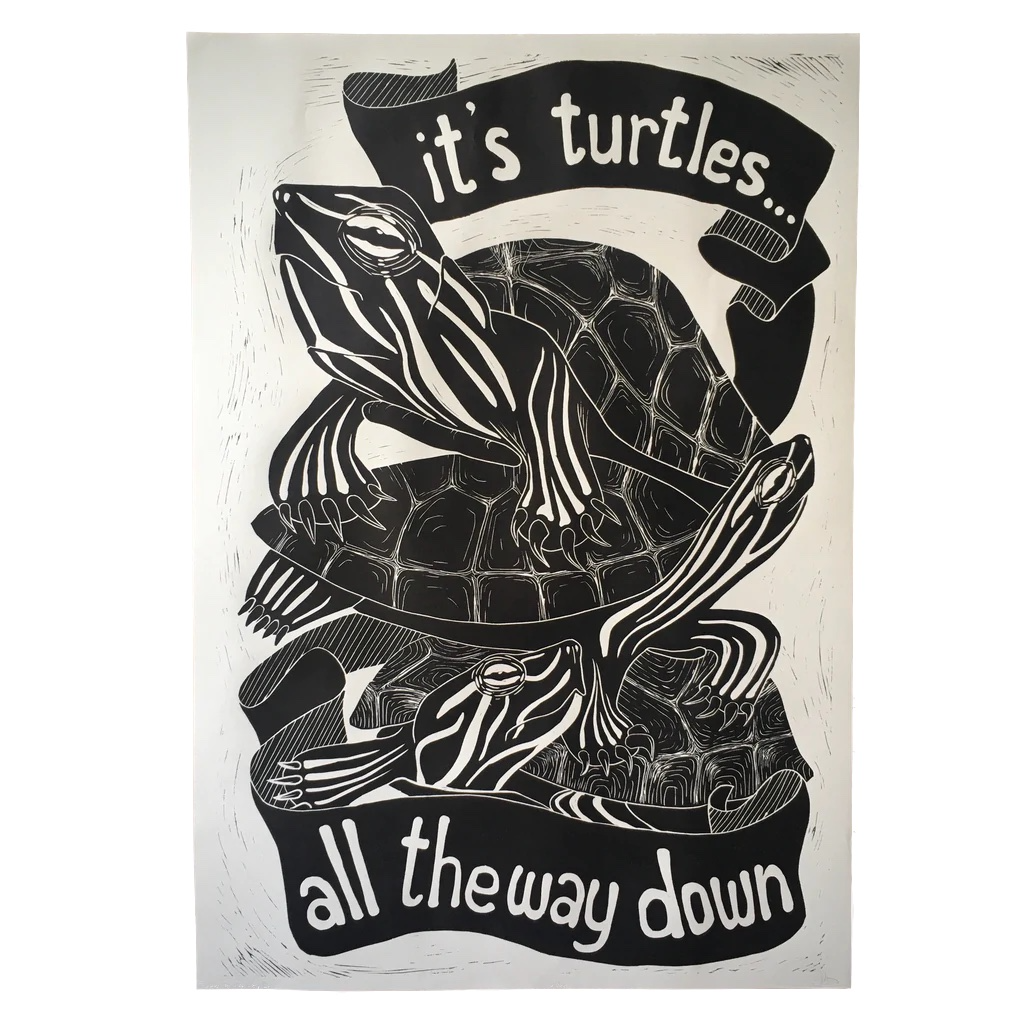

## A Quick Overview of Properties

In Python, properties are a way to define methods that are accessed like attributes. They are a way to implement getters and setters for an object's attributes, which can be useful for providing controlled access to an attribute's value.

In [19]:
class Person:
    def __init__(self, name: str, age: int):
        self._name = name
        self._age = age

    # Getter
    @property
    def name(self) -> str:
        return self._name

    # Getter
    @property
    def age(self) -> int:
        return self._age

    # Setter
    @age.setter
    def age(self, value: int) -> None:
        if value < 0:
            raise ValueError("Age cannot be negative.")
        self._age = value

# Create a new Person object
p = Person("John", 36)

# Get the person's name
print(p.name)  # Output: John

# Get the person's age
print(p.age)  # Output: 36

# Set the person's age
p.age = 40
print(p.age)  # Output: 40

# This will raise a ValueError
p.age = -5


John
36
40


ValueError: Age cannot be negative.

In the above example, the name and age attributes of the Person class are implemented using properties. This allows us to define custom getter and setter functions for these attributes, so we can control how they are accessed and modified. For example, the age attribute has a setter function that ensures the age is never negative.

Properties are useful because they allow us to define custom behavior for accessing and modifying an attribute, without having to use methods like get_name() and set_name(). This makes the code more concise and easier to read.

## A Note About OOP, Functional Programming, and When to Use OOP

The choice between using object-oriented programming (OOP) and functional programming in Python depends on the specific needs of your project.

In OOP, you define classes that represent real-world entities, and then create objects that are instances of those classes. OOP is a powerful way to organize your code, and is particularly useful for projects that have a lot of complex data and interactions between different entities.

Functional programming, on the other hand, is a programming paradigm that focuses on the use of functions to perform operations on data. In functional programming, you typically define a set of pure functions that take inputs and produce outputs without modifying any external state. This makes functional programming a good choice for projects that require a high level of concurrency, or that need to be highly scalable.

Ultimately, the choice between OOP and functional programming in Python (or any other language) depends on the specific requirements of your project, as well as your personal preferences and experience. Some developers prefer to use OOP for most projects, while others prefer functional programming, and still others use a combination of both paradigms.

## Resources

* [OOP in Python](https://realpython.com/python3-object-oriented-programming/)
* [OOP vs Functional Python](https://beapython.dev/2020/01/21/functional-vs-object-oriented-programming-in-python/)